# Exploring the Rates of Assualt Death and Poverty

The original Jupyter Notebook can be viewed [here](https://github.com/PeiZhangOSU/Assault-and-Poverty/blob/master/assault_vs_poverty.db).

Source of original data:
- Assault: https://wonder.cdc.gov, Compressed Mortality, 2013-2015, ICD-10 codes: X85-Y09 (Assault)
- Poverty: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-people.html, Table 19. Percent of Persons in Poverty, by State, 2013-2015

I generated a csv file [combined.csv](https://github.com/PeiZhangOSU/Assault-and-Poverty/blob/master/combined.csv) using SQLite, which contains 4 columns:
1. State: State names
2. Year: Year of the data, 2013-2015
3. Assault_Death_Rate: Rates of death from assault per 100,000 (using 2000 U.S. Std. Population), age adjusted
4. Poverty_Percentage: Percentage of persons in poverty

Here I will use this combined.csv file for exploring the rates of assualt death and the poverty rates.

In [1]:
# Load libraries
library(lattice)
library(ggplot2)
library(gridExtra)

In [2]:
# Read combined.csv (generated from SQL) into R
combined <- read.csv(file = 'combined.csv', header = TRUE, sep=',')

In [3]:
# Brief look at the data
summary(combined)

        State          Year      Assault_Death_Rate Poverty_Percentage
 Alabama   :  3   Min.   :2013   Min.   : 1.300     Min.   : 5.50     
 Alaska    :  3   1st Qu.:2013   1st Qu.: 2.900     1st Qu.:10.90     
 Arizona   :  3   Median :2014   Median : 4.700     Median :13.10     
 Arkansas  :  3   Mean   :2014   Mean   : 5.114     Mean   :13.77     
 California:  3   3rd Qu.:2015   3rd Qu.: 6.500     3rd Qu.:16.43     
 Colorado  :  3   Max.   :2015   Max.   :17.300     Max.   :25.80     
 (Other)   :134                                                       

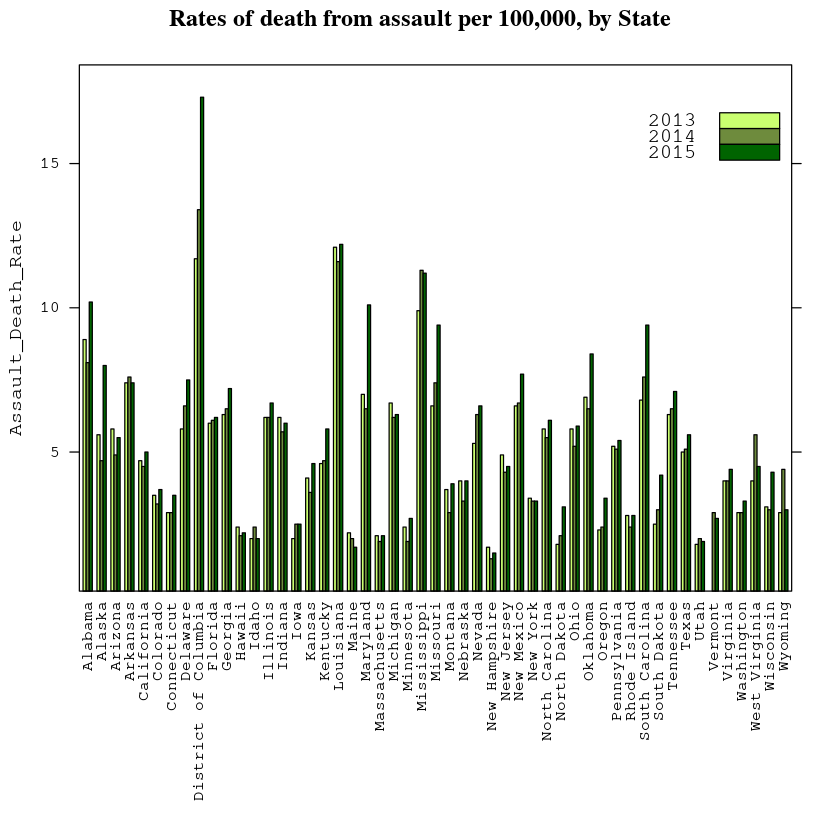

In [4]:
# Barchart of Assault_Death_Rate by State
barchart(Assault_Death_Rate ~ State, data = combined, groups = Year, scales = list(x = list(rot = 90)), 
         auto.key = list(corner = c(1,0.9)), main = 'Rates of death from assault per 100,000, by State',
         par.settings=list(superpose.polygon = list(col = c('darkolivegreen1','darkolivegreen4', 'darkgreen'))))

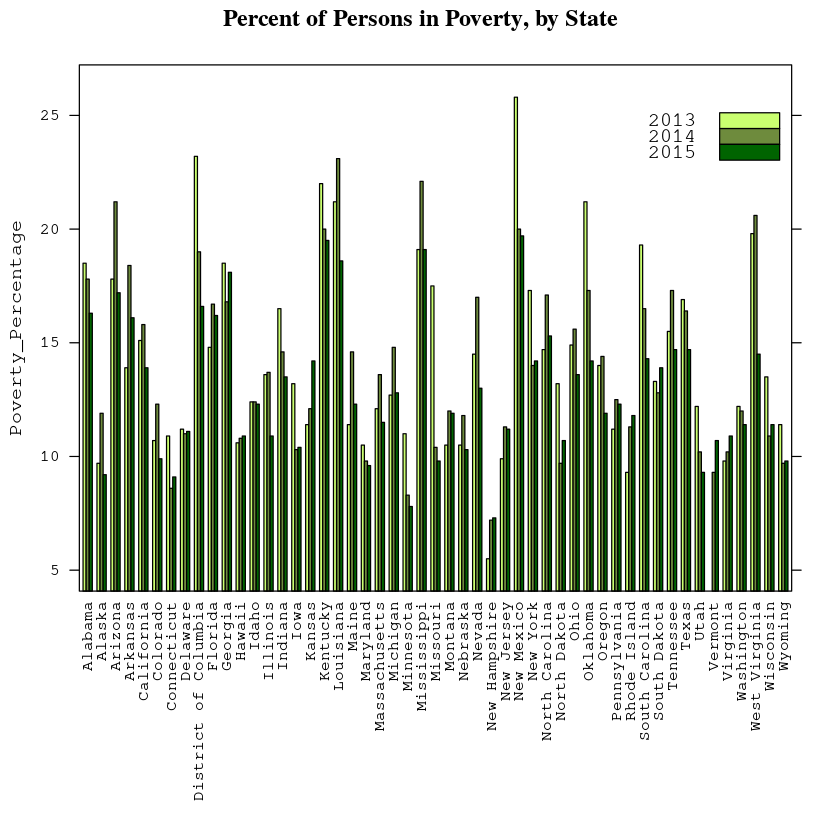

In [5]:
# Barchart of Poverty_Percentage by State
barchart(Poverty_Percentage ~ State, data = combined, groups = Year, scales = list(x = list(rot = 90)), 
         auto.key = list(corner = c(1,0.9)), main = 'Percent of Persons in Poverty, by State',
         par.settings=list(superpose.polygon = list(col = c('darkolivegreen1','darkolivegreen4', 'darkgreen'))))

The graphs show that for most states, neither Assault_Death_Rate or Poverty_Percentage vary dramatically during 2013-2015. Thus I decided the three year data could be summarized sufficiently by the three-year mean.

In [6]:
# Plot the mean
combined_mean <- aggregate(cbind(Assault_Death_Rate, Poverty_Percentage) ~ State, combined, mean)
head(combined_mean,10)

State,Assault_Death_Rate,Poverty_Percentage
Alabama,9.066667,17.533333
Alaska,6.100000,10.266667
Arizona,5.400000,18.733333
Arkansas,7.466667,16.133333
California,4.733333,14.933333
Colorado,3.466667,10.966667
Connecticut,3.100000,9.533333
Delaware,6.633333,11.100000
District of Columbia,14.133333,19.600000
Florida,6.100000,15.900000


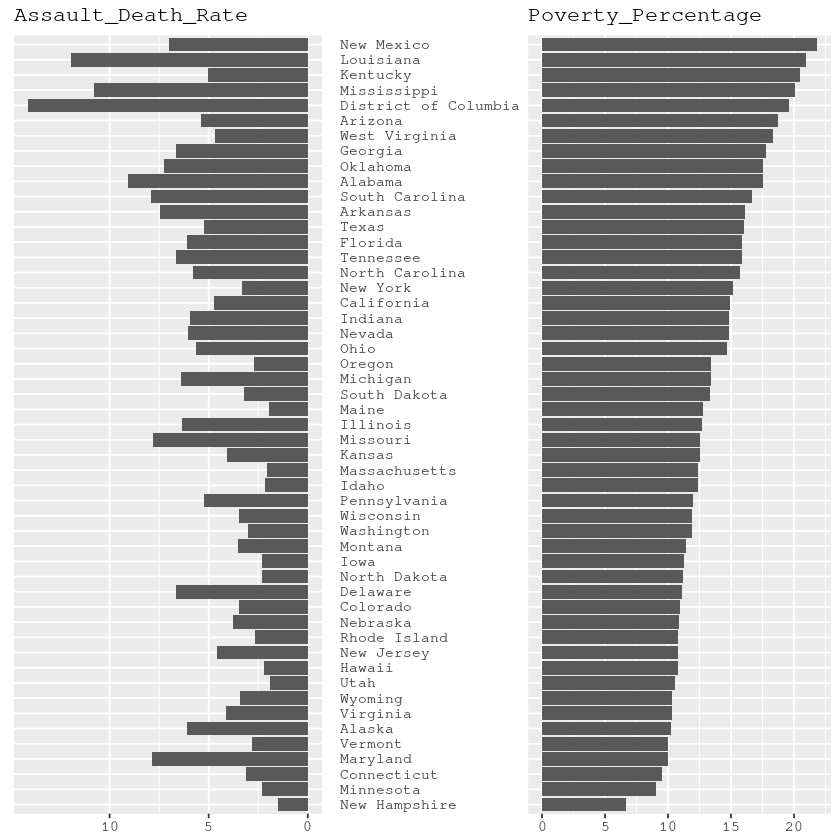

In [7]:
# This is a hacky way to produce a back-to-back horizontal bar plot.
p1 <- ggplot(data = combined_mean, aes(x = reorder(State, Poverty_Percentage) , y = Assault_Death_Rate)) + 
      geom_bar(stat="identity") + coord_flip() + scale_y_reverse() + ggtitle('Assault_Death_Rate') +
      theme(axis.ticks.y = element_blank(), axis.text.y = element_blank(), axis.title.y = element_blank(), 
           axis.title.x = element_blank())
p2 <- ggplot(data = combined_mean, aes(x = reorder(State, Poverty_Percentage), y = Poverty_Percentage)) + 
      geom_bar(stat="identity") + ggtitle('Poverty_Percentage') + coord_flip() +
      theme(axis.ticks.y = element_blank(), axis.title.y = element_blank(), axis.text.y = element_text(hjust=0),
            axis.title.x = element_blank())
grid.arrange(p1, p2, ncol=2, widths = c(1.3, 2))

The bar graph above indicates there is correlation between the assault death rate and the poverty rate. The corrlation can be calculated as:

In [8]:
cor(combined_mean$Assault_Death_Rate, combined_mean$Poverty_Percentage)

[1] 0.6786253

A scatter plot of Assault_Death_Rate ~ Poverty_Percentage suggests they have an approximately linear relationship.

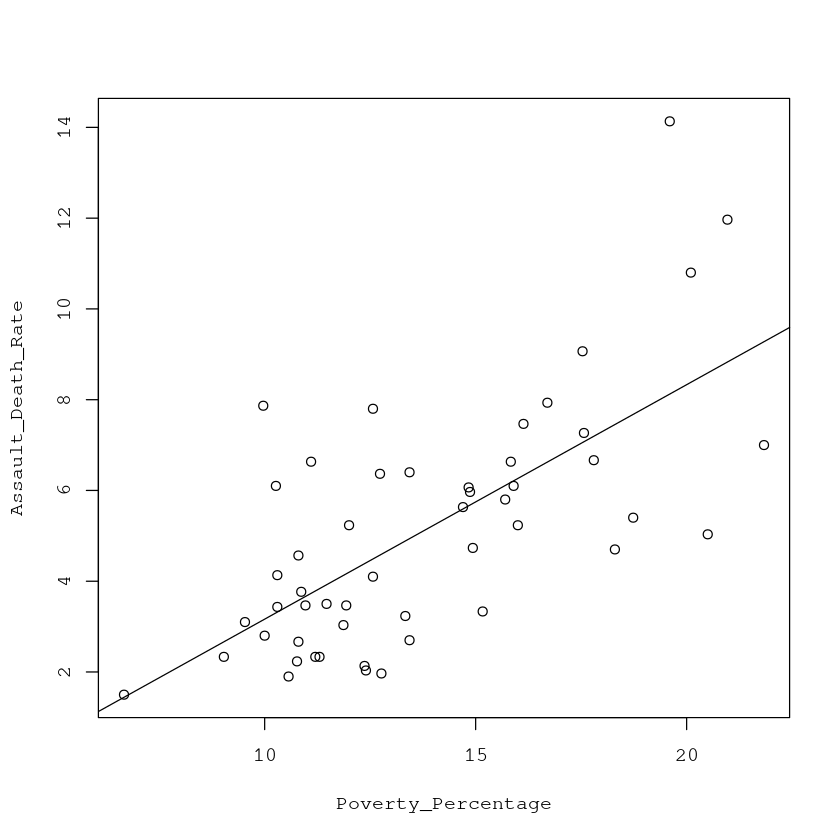

In [9]:
plot(Assault_Death_Rate ~ Poverty_Percentage, data = combined_mean)
abline(lm(Assault_Death_Rate ~ Poverty_Percentage, data = combined_mean))

Of course, in real life there are a lot more nuances we need to consider to fully explore the relationship between the assault death rate and the poverty rate. For example, we may need to ask whether aggregation at the state level is appropriate. And of course correlation does not imply causation. Nevertheless, this exploration of public data set demonstrated the use of SQLite and R as useful open source data analysis tools.